In [2]:
import pandas as pd
import numpy as np

In [3]:
Xbox_data=pd.read_csv('train.csv')

In [4]:
Xbox_data.head()

,user,sku,category,query,click_time,query_time
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206


In [5]:
Xbox_data.describe()

,sku
count,4.236500e+04
mean,2.360281e+11
std,4.858031e+13
min,1.004622e+06
25%,2.173065e+06
50%,2.670133e+06
75%,3.046603e+06
max,9.999169e+15


In [6]:
Xbox_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42365 entries, 0 to 42364
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user        42365 non-null  object
 1   sku         42365 non-null  int64 
 2   category    42365 non-null  object
 3   query       42365 non-null  object
 4   click_time  42365 non-null  object
 5   query_time  42365 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


In [7]:
Xbox_data['query'].nunique()

5960

In [8]:
Xbox_data['query'].isnull().values.any()

False

In [9]:
Xbox_data['sku'].nunique()

413

In [10]:
Xbox_data['category'].nunique()

1

<AxesSubplot:>

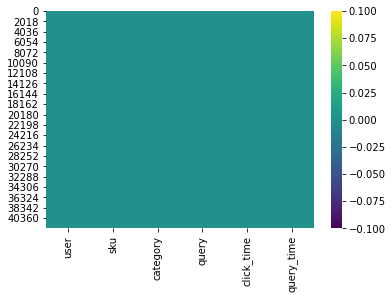

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(Xbox_data.isnull(),cmap='viridis')

In [12]:
X = Xbox_data.drop(['user', 'sku', 'category'],axis=1)
y = Xbox_data.sku


In [13]:
from datetime import datetime

X.click_time = X[['click_time']].transform(lambda x: x + '.' + '0' * 6 if len(x) == 19  else x + (26 - len(x)) * '0')
X.query_time = X[['query_time']].transform(lambda x: x + '.' + '0' * 6 if len(x) == 19  else x + (26 - len(x)) * '0')

X = X.transform({'query': (lambda x: x.lower()), 'click_time':(lambda time: int(''.join(c for c in time if c.isdigit()))), \
                'query_time': (lambda time: int(''.join(c for c in time if c.isdigit())))})

In [14]:
query_type = X['query'].unique()
query_size = X['query'].nunique()
query_dict = {query_type[i]: i for i in range(query_size)}
query_dict['ncaa 2011']

959

In [15]:
X =  X.transform({'query': (lambda x: query_dict[x]), 'click_time': (lambda x: x), 'query_time' : (lambda x: x)})

In [82]:
X

,query,click_time,query_time
0,0,20111009172256101,20111009172142917
1,0,20110925133542198,20110925133533234
2,0,20110925133608668,20110925133533234
3,1,20110925133723709,20110925133700049
4,2,20110911151534336,20110911151526206
...,...,...,...
42360,16,20110927225329344,20110927225304644
42361,45,20111014124414669,20111014124407004
42362,45,20111014124431228,20111014124407004
42363,2294,20111010084610368,20111010084356768


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

predictions=rfc.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [22]:
print(accuracy_score(y_test,predictions))

0.47671125098347755


In [23]:
import xgboost as xgb

In [139]:
xgb_cl=xgb.XGBClassifier(objective='binary:logistic')

In [141]:
xgb_cl.fit(X_train,y_train)

/Users/akashyadav/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:54:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
boost_prediction=xgb_cl.predict(X_test)

In [144]:
print(accuracy_score(y_test,boost_prediction))

0.4383162863886703


Encoding

In [26]:
X_hut=Xbox_data.drop(['sku','category','user'],axis=1)

In [27]:
query=pd.get_dummies(X_hut['query'],drop_first=True)

In [28]:
from datetime import datetime

X_hut.click_time = X_hut[['click_time']].transform(lambda x: x + '.' + '0' * 6 if len(x) == 19  else x + (26 - len(x)) * '0')
X_hut.query_time = X_hut[['query_time']].transform(lambda x: x + '.' + '0' * 6 if len(x) == 19  else x + (26 - len(x)) * '0')

X_hut = X_hut.transform({'click_time':(lambda time: int(''.join(c for c in time if c.isdigit()))), \
                'query_time': (lambda time: int(''.join(c for c in time if c.isdigit())))})

In [29]:
X_hut =  X_hut.transform({ 'click_time': (lambda x: x), 'query_time' : (lambda x: x)})

In [30]:
X_hut=pd.concat([X_hut,query],axis=1)

In [31]:
X_hut.head(10)

,click_time,query_time,*,.wwe 12,//,0,007,007 video games,007 blood stone,1 month xbox,1067848,1196523,12,1200 xbox Microsoft points,1219686,1342081 1342106 1342115 1342124,16GB iPod touch,16mb memory cards for cell phones,2.5 inch internal hard drive ps3 seagate,2011 f1,20110701_RZGC,20110801_GOW3,201109_Gaming,2011_Nov_Gaming,2012 PES,2012 cabela hunter,2012 golf masters,2012 madden dsi,2173065,22,2371074 2126339 2126108,2398896 2402035 5386263 5386272 6804112 8579932 8589878 9374278 9650424,2467183,250 gb harddrive xbox,2541184,2622037 2127204 2127213 212 nintendo wii video games1716 2138291,2622037 2127204 2127213 2121716 2138291,2628429,2794253,2833031,...,xbox360 game remotes,xbox360 games,xbox360 just dance,xbox360 kinect,xbox360 modern warfare 2,xbox360 systems,xbox360 wireless connector,xboz 360,xboz 360 console,xmen,xmen destiney,xmen destiny,xmen first class,xmen: destiny,xxbox,y2k12,yelawolf,yoostar,yoostar 2,you dont know jack,you dont know jack the game,you dont know jack xbox 360,young jeezy,your shape,your shape firness,your shape xbox,yourshape,zelda,zomba,zombie land,zumba,zumba dvd,zumba dvd,zumba fitness,zumba for kinect,zumba for xbox,zumba game,zumba video game,zumba workout dvd,zumbaa
0,20111009172256101,20111009172142917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20110925133542198,20110925133533234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20110925133608668,20110925133533234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20110925133723709,20110925133700049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20110911151534336,20110911151526206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,20111025204436756,20111025204422861,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,20111029201006459,20111029200933475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,20110812180540887,20110812180506414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,20111007000254236,20111007000244212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,20110930083951651,20110930083640246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
X_hut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42365 entries, 0 to 42364
Columns: 5961 entries, click_time to zumbaa
dtypes: int64(2), uint8(5959)
memory usage: 241.4 MB


In [33]:
X_hut
y_hut=Xbox_data['sku']

In [34]:
from sklearn.model_selection import train_test_split
Xhut_train, Xhut_test, yhut_train, yhut_test = train_test_split(X_hut, y_hut, test_size=0.3, random_state=101)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(Xhut_train,yhut_train)



RandomForestClassifier(n_estimators=200)

In [36]:
predictions_hut=rfc.predict(Xhut_test)

In [37]:
print(accuracy_score(yhut_test,predictions_hut))
print('\n')
print(precision_score(yhut_test,predictions_hut,average='weighted'))

0.5433516915814319


0.5474542219140035


/Users/akashyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PCA 

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_hut)

StandardScaler()

In [39]:
scalar_data=scaler.transform(X_hut)

In [40]:
scalar_data.shape

(42365, 5961)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [42]:
pca.fit(scalar_data)

PCA(n_components=2)

In [43]:
x_pca = pca.transform(scalar_data)

In [44]:
x_pca.shape

(42365, 2)

In [45]:
x_pca

array([[-0.34259952,  0.04030706],
       [-0.14018073,  0.06160112],
       [-0.14018073,  0.06160112],
       ...,
       [-0.01731815, -0.22375544],
       [ 0.01299388, -1.99764097],
       [-0.98183948, -5.13490348]])

In [46]:
pca.components_

array([[-0.30536266, -0.1554336 ,  0.0176487 , ...,  0.01002167,
         0.00587119, -0.00253331],
       [ 0.11003202, -0.20867588, -0.00958517, ..., -0.0139936 ,
         0.01363237, -0.00303448]])